<a href="https://colab.research.google.com/github/krajak09/Master-Thesis/blob/main/Kalman_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kalman Filter


The state space model consists of the **observation model** and the **transition model**:

$$
y_t = x_t^\top \beta_t + \varepsilon_t \tag{3.10a}
$$

$$
\beta_t = F_t \beta_{t-1} + \zeta_t \tag{3.10b}
$$

The noise terms are assumed to be normally distributed:

$$
\varepsilon_t \sim \mathcal{N}(0, \sigma^2), \quad \zeta_t \sim \mathcal{N}(0, Z) \tag{3.11}
$$

The initial state is also normally distributed:

$$
\beta_0 \sim \mathcal{N}(\hat{\beta}_{0 \mid 0}, P_{0 \mid 0}) \tag{3.12}
$$

**Theorem 3.2 (Kalman Filter):**
Consider the state space model (3.10a)–(3.10b) together with the error or innovations distribution (3.11) and the initial distribution (3.12). Then, for each time $t = 1, \dots, n$, the following apply:

1. The forecast distribution of $\beta_t$ at time $t-1$ is
$$
\beta_t \mid y_{1:t-1} \sim \mathcal{N}\left( \hat{\beta}_{t \mid t-1}, P_{t \mid t-1} \right),
$$
where
$$
\hat{\beta}_{t \mid t-1} = F_t \hat{\beta}_{t-1 \mid t-1} \quad \text{and} \quad P_{t \mid t-1} = F_t P_{t-1 \mid t-1} F_t^\top + Z_t.
$$

2. The posterior distribution of $\beta_t$ at time $t$ is
$$
\beta_t \mid y_{1:t} \sim \mathcal{N}\left( \hat{\beta}_{t \mid t}, P_{t \mid t} \right),
$$
where
$$
\hat{\beta}_{t \mid t} = \hat{\beta}_{t \mid t-1} + K_t e_t,
$$
$$
\hat{y}_{t \mid t-1} = x_t^\top \hat{\beta}_{t \mid t-1}, \quad e_t = y_t - \hat{y}_{t \mid t-1}, \quad q_{t \mid t-1} = x_t^\top P_{t \mid t-1} x_t + \sigma^2,
$$
$$
K_t = \frac{P_{t \mid t-1} x_t}{q_{t \mid t-1}} \quad \text{and} \quad P_{t \mid t} = P_{t \mid t-1} - q_{t \mid t-1} K_t K_t^\top.
$$

**Understand the model**

Algorithm Steps
1. Predict the next state using the previous estimate and predit the uncertainty
2. Compute the Kalman Gain
3. Update the estimate using new measurement
4. Update the uncertainty

**Q**: Why Kalman Filter? <br>
**A**: Handles noisy data effectively, computationally efficient, runs in real time, recursive, meaning it updates as new data arrives without needing to store past data.

In [ ]:
import numpy as np

def kalman_filter(beta, P, y_t, x_t, F_t, Z_t, sigma2):

    # Prediction (Prior)
    beta_pred = F_t @ beta  # β_{t|t-1}
    P_pred = F_t @ P @ F_t.T + Z_t  # P_{t|t-1}

    # Update (Posterior)
    y_pred = x_t.T @ beta_pred  # ŷ_{t|t-1}
    e_t = y_t - y_pred  # Innovation
    q = x_t.T @ P_pred @ x_t + sigma2  # q_{t|t-1}
    K_t = P_pred @ x_t / q  # Kalman gain

    beta_updated = beta_pred + K_t * e_t  # β_{t|t}
    P_updated = P_pred - q * np.outer(K_t, K_t)  # P_{t|t}; outer is used for product of two vectors

    return beta_updated, P_updated, e_t

    """
    Parameters:
    beta : np.array - Previous state estimate (β_{t-1|t-1})
    P : np.array - Previous covariance matrix
    y_t : float - Current measurement
    x_t : np.array - Current observation vector
    F_t : np.array - State transition matrix
    Z_t : np.array - Process noise covariance
    sigma2 : float - Measurement noise variance (σ²)

    Returns:
    beta_updated : np.array - Updated state estimate (β_{t|t})
    P_updated : np.array - Updated covariance matrix
    e_t : float - Innovation residual
    """

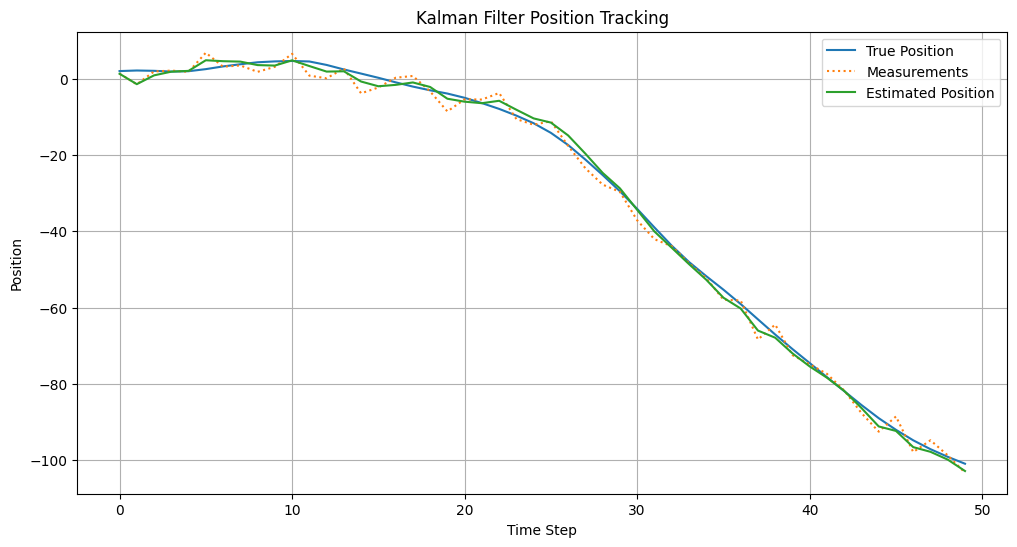

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Time step
dt = 1.0

# State transition matrix F_t
F_t = np.array([[1., dt],
                [0., 1.]])

# Observation matrix x_t
H = np.array([[1., 0.]])
x_t

# Process noise covariance Z_t)
q = 0.13
Z_t = np.array([[0.25 * dt**4, 0.5 * dt**3],
                [0.5 * dt**3, dt**2]]) * q

# Measurement noise variance (sigma2)
sigma2 = 5.0

# Initial state estimate (beta)
beta = np.array([[2.],
                 [0.]])

# Initial covariance matrix (P)
P = np.eye(2) * 1000.0

# Number of steps
num_steps = 50

# True initial state
true_state = np.array([[2.],
                       [0.]])

# Arrays to store results
true_positions = []
measurements = []
estimated_positions = []
estimated_velocities = []

# Simulation loop
for _ in range(num_steps):
    # Simulate true state
    true_state = F_t @ true_state + np.random.multivariate_normal([0, 0], Z_t).reshape(2, 1)
    true_pos = true_state[0, 0]
    true_positions.append(true_pos)

    # Simulate measurement
    measurement = true_pos + np.random.normal(0, np.sqrt(sigma2))
    measurements.append(measurement)

    # Apply Kalman filter
    x_t = H.T  # Observation vector
    beta, P, _ = kalman_filter(beta, P, measurement, x_t, F_t, Z_t, sigma2)

    # Store estimates
    estimated_positions.append(beta[0, 0])
    estimated_velocities.append(beta[1, 0])

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(true_positions, label='True Position')
plt.plot(measurements, label='Measurements', linestyle='dotted')
plt.plot(estimated_positions, label='Estimated Position')
plt.xlabel('Time Step')
plt.ylabel('Position')
plt.title('Kalman Filter Position Tracking')
plt.legend()
plt.grid(True)
plt.show()